In [8]:
import pandas as pd
from sklearn.datasets import load_wine
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset from scikit-learn
wine = load_wine()
# Convert it into a pandas DataFrame, which you likely already have as `train`
X = pd.DataFrame(wine.data, columns=wine.feature_names)

print("Dataset Head:")
display(X.head())

print("\nDataset Info (confirming no missing values):")
X.info()

Dataset Head:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



Dataset Info (confirming no missing values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline           

In [10]:
chi_square_value, p_value = calculate_bartlett_sphericity(X)
print(f"Bartlett's Test: Chi-Square Value = {chi_square_value:.2f}, p-value = {p_value:.10f}")

if p_value < 0.05:
    print("✅ The test is statistically significant, indicating the data is likely suitable for factor analysis.")
else:
    print("❌ The test was not significant. The data may not be suitable for factor analysis.")

Bartlett's Test: Chi-Square Value = 1317.18, p-value = 0.0000000000
✅ The test is statistically significant, indicating the data is likely suitable for factor analysis.


In [11]:
kmo_all, kmo_model = calculate_kmo(X)
print(f"\nKaiser-Meyer-Olkin (KMO) Test: {kmo_model:.2f}")

if kmo_model > 0.6:
    print("✅ The KMO score is acceptable, indicating the data is suitable for factor analysis.")
else:
    print("❌ The KMO score is low. You might need to reconsider your variables.")


Kaiser-Meyer-Olkin (KMO) Test: 0.78
✅ The KMO score is acceptable, indicating the data is suitable for factor analysis.


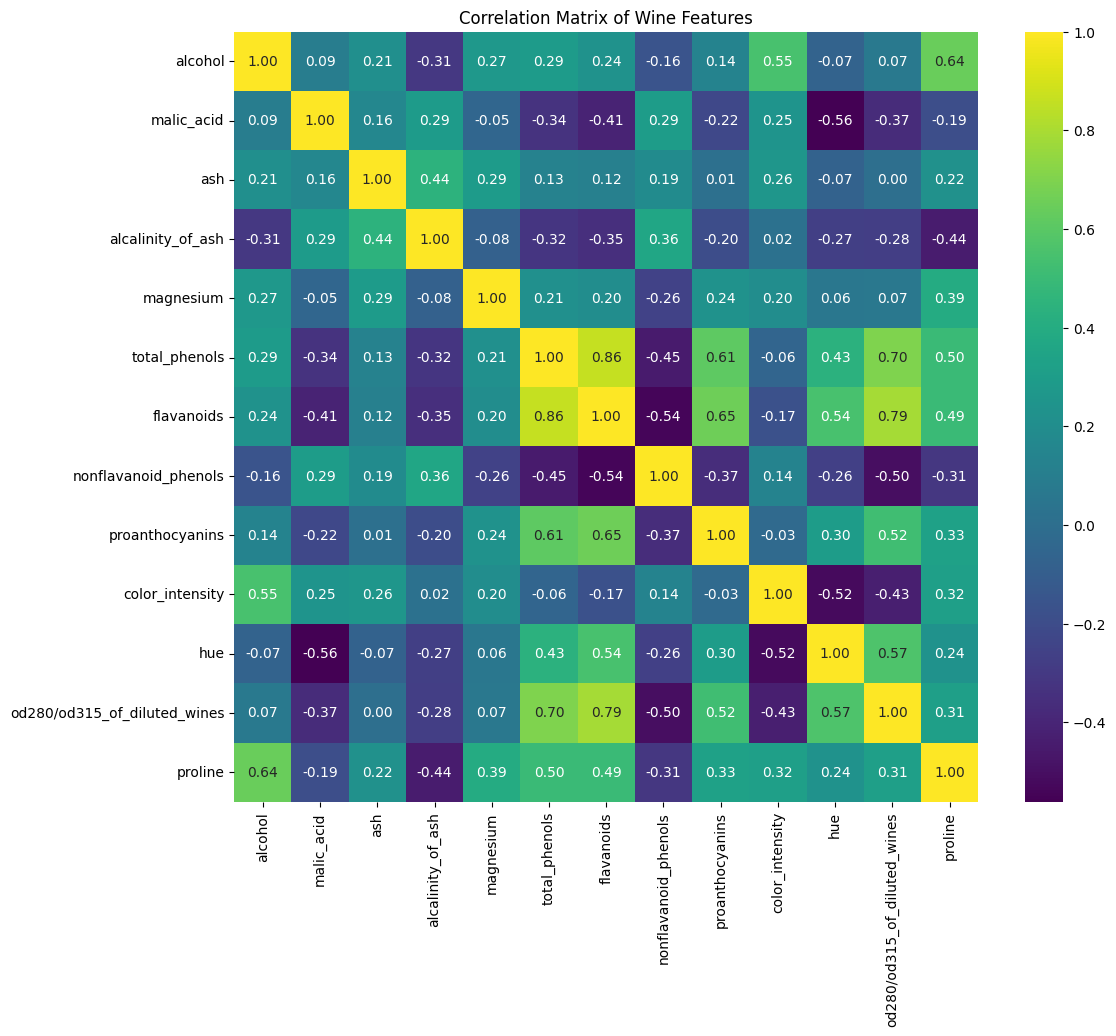

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='viridis', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()

C:\Users\basde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


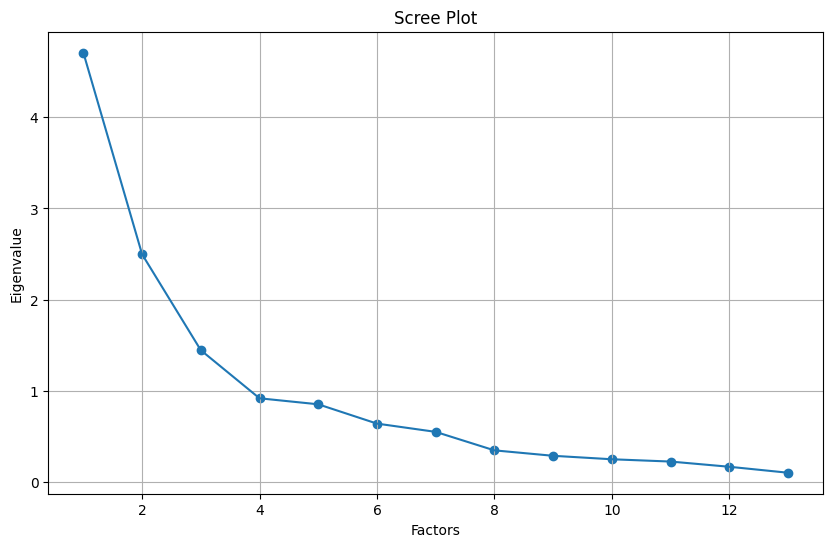

In [13]:
# Fit a preliminary Factor Analysis model to get the eigenvalues
fa_initial = FactorAnalyzer(n_factors=X.shape[1], rotation=None)
fa_initial.fit(X)
ev, v = fa_initial.get_eigenvalues()

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, X.shape[1] + 1), ev)
plt.plot(range(1, X.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()